# Phase 3 — Feature Selection


In [9]:
#  Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [10]:
# Loading the cleaned dataset from Google Drive

from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/heart_disease_cleaned.csv.csv"


df = pd.read_csv(path)

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

print("Dataset shape:", X.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (303, 25)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [11]:
#  Apply Random Forest to calculate feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

# Show top features
feat_imp.head(15)


,feature,importance
0,thalach,0.116113
1,oldpeak,0.104251
2,chol,0.100594
3,age,0.092518
4,trestbps,0.086897
5,ca_0.0,0.063721
6,cp_4.0,0.053395
7,thal_7.0,0.047650
8,thal_3.0,0.044705
9,exang,0.041234


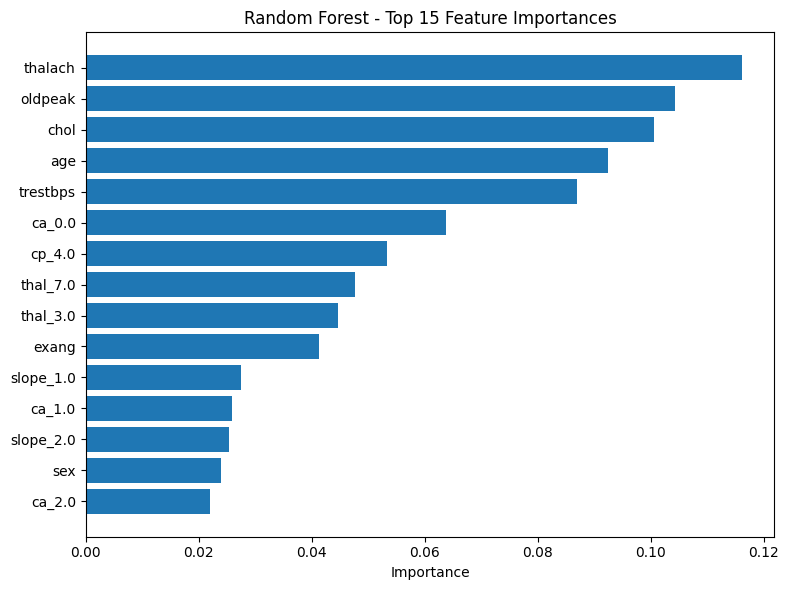

In [12]:
#  Plot the top 15 features
top_n = 15
plt.figure(figsize=(8,6))
plt.barh(feat_imp["feature"].iloc[:top_n][::-1],
         feat_imp["importance"].iloc[:top_n][::-1])
plt.xlabel("Importance")
plt.title(f"Random Forest - Top {top_n} Feature Importances")
plt.tight_layout()
plt.show()


In [13]:
#  Selecting the top 15 features and create reduced dataset
top_features = feat_imp["feature"].iloc[:15].tolist()
df_selected = df[top_features + ["target"]]

# Save reduced dataset directly to Google Drive
save_path = "/content/drive/My Drive/selected_features.csv"
df_selected.to_csv(save_path, index=False)

print("Saved file to:", save_path)
df_selected.head()


Saved file to: /content/drive/My Drive/selected_features.csv


,thalach,oldpeak,chol,age,trestbps,ca_0.0,cp_4.0,thal_7.0,thal_3.0,exang,slope_1.0,ca_1.0,slope_2.0,sex,ca_2.0,target
0,0.017197,1.087338,-0.264900,0.948726,0.757525,1.0,0.0,0.0,0.0,-0.696631,0.0,0.0,0.0,0.686202,0.0,0
1,-1.821905,0.397182,0.760415,1.392002,1.611220,0.0,1.0,0.0,1.0,1.435481,0.0,0.0,1.0,0.686202,0.0,2
2,-0.902354,1.346147,-0.342283,1.392002,-0.665300,0.0,1.0,1.0,0.0,1.435481,0.0,0.0,1.0,0.686202,1.0,1
3,1.637359,2.122573,0.063974,-1.932564,-0.096170,1.0,0.0,0.0,1.0,-0.696631,0.0,0.0,0.0,0.686202,0.0,0
4,0.980537,0.310912,-0.825922,-1.489288,-0.096170,1.0,0.0,0.0,1.0,-0.696631,1.0,0.0,0.0,-1.457296,0.0,0
